# Machine Learning Program Assignment 1

In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from time import *

## 1. Load training data

In [753]:
data = pd.read_csv("archive/train.csv")

In [754]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [755]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [756]:
data.shape

(2000, 21)

In [757]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [758]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [759]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Is the dataset balanced or imbalanced? 

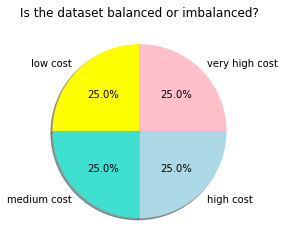

In [760]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Is the dataset balanced or imbalanced?')
plt.show()

#### We can see from the figure that our dataset is very balanced, the four classes are equal in number

### The correlation between features and target variable by plotting heatmap

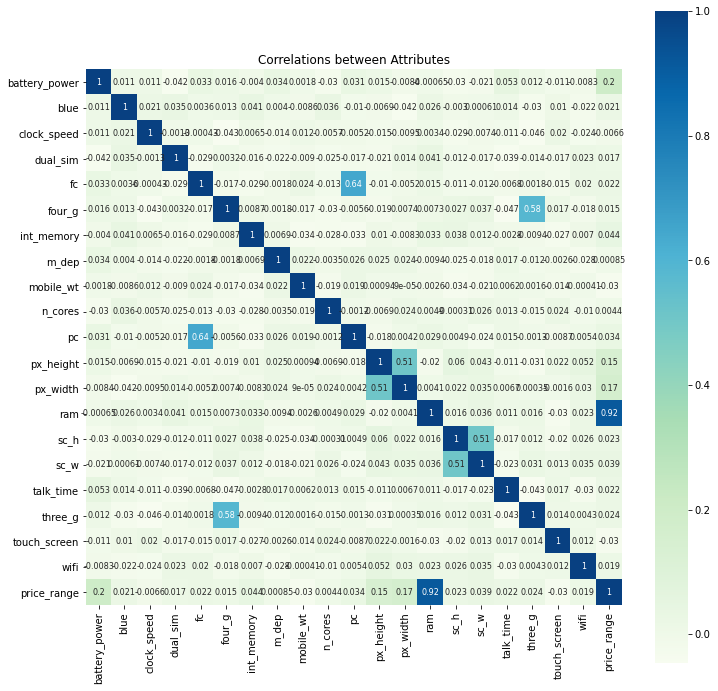

In [761]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

## 2. Data Preprocessing

#### Convert labels into to two classes: low (0, 1) and high (2, 3)

In [762]:
data["price_classification"] = np.where(data["price_range"] <= 1, 0, 1)
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  price_classifi

#### Split the original ‘train.csv’ into ‘train.csv’, ‘valid.csv’ and ‘test.csv’ with the ratio of 0.8 : 0.1 : 0.1

In [763]:
x = data
y = data["price_range"]
train_data, tmp_x, train_y, tmp_y = train_test_split(x, y, test_size = 0.2, random_state = None, stratify = y)
test_data, valid_data, test_y, valid_y = train_test_split(tmp_x, tmp_y, test_size = 0.5, random_state = 101, stratify = tmp_y)

#### Test whether the split works correctly

In [764]:
print(train_data.shape)
print(test_data.shape)
print(valid_data.shape)
train_data.head()

(1600, 22)
(200, 22)
(200, 22)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_classification
545,767,0,1.9,0,16,1,19,0.2,185,6,...,1000,2445,6,1,6,1,1,1,1,0
263,767,0,1.5,0,4,0,28,0.7,175,4,...,1517,527,10,0,15,0,1,0,0,0
1923,1056,1,2.1,1,8,1,37,0.7,101,3,...,979,2651,15,5,3,1,1,1,2,1
1596,832,1,0.5,1,1,1,5,0.1,165,5,...,1944,3946,12,5,14,1,1,1,3,1
416,912,1,2.0,0,1,0,54,0.3,161,8,...,1053,2330,19,5,20,0,1,0,1,0


#### Write the data back to the csv file

In [765]:
train_data.to_csv("train.csv")
test_data.to_csv("test.csv")
valid_data.to_csv("valid.csv")

## 3. Model Implementation

### 3.1 The Sigmoid function

In [766]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 3.2 Logistic Regression

In [767]:
class LogisticRegression():
    def __init__(self, learning_rate=.1, n_iterations=4000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def initialize_weights(self, n_features):
        # w = np.zeros((n_features, 1))
        limit = np.sqrt(1 / n_features)
        w = np.random.uniform(-limit, limit, (n_features, 1))
        b = 0
        self.w = np.insert(w, 0, b, axis=0)

    def cost_function(self, data, labels):
        num_examples = data.shape[0]
        num_params = data.shape[1]
        sumOfErrors = 0
        for i in range(num_examples):
            xi = data[i]
            hi = self.hypothesis(xi, self.w)
            if labels[i] == 1:
                error = labels[i] * np.log(hi[0])
            elif labels[i] == 0:
                error = (1 - labels[i]) * np.log(1 - hi[0])
            sumOfErrors += error
        return -1 / num_examples * sumOfErrors

    @staticmethod
    def hypothesis(data, theta):
        z = 0
        num_params = theta.shape[0]
        for i in range(num_params):
            z += data[i] * theta[i]
        return sigmoid(z)

    def fit(self, X, y, valid_X, valid_y):
        # normal_X = preprocessing.scale(X)
        self.scaler = preprocessing.StandardScaler().fit(X)
        normal_X = self.scaler.transform(X)
        m_samples, n_features = normal_X.shape
        self.initialize_weights(n_features)
        normal_X = np.insert(normal_X, 0, 1, axis=1)
        y = np.reshape(y, (m_samples, 1))
        cost_history = []
        correctness = []
        for i in range(self.n_iterations):
            h_x = normal_X.dot(self.w)
            y_pred = sigmoid(h_x)
            w_grad = normal_X.T.dot(y_pred - y)
            self.w = self.w - self.learning_rate * w_grad
            if i % 200 == 0:
                cost = self.cost_function(normal_X, y)
                accuracy = self.test(valid_X, valid_y)
                if len(correctness) > 0 and accuracy - correctness[len(correctness) - 1] > 0.0001:
                    self.n_iterations += 200
                if len(cost_history) > 0 and cost > cost_history[len(cost_history) - 1]:
                    self.learning_rate /= 2
                cost_history.append(cost)
                correctness.append(accuracy)
        return self.w, cost_history, correctness

    def predict(self, X):
        # normal_X = normalize(X, norm = 'max')
        # normal_X = preprocessing.scale(X)
        normal_X = self.scaler.transform(X)
        normal_X = np.insert(normal_X, 0, 1, axis=1)
        h_x = normal_X.dot(self.w)
        y_pred = np.round(sigmoid(h_x))
        return y_pred.astype(int)

    def test(self, X, y):
        y_pred = self.predict(X)
        right_count = 0
        m_samples = X.shape[0]
        for i in range(m_samples):
            if y_pred[i] == y[i]:
                right_count += 1
        return right_count / m_samples 

### 3.3 Naive Bayes

In [768]:
class NaiveBayes():
    def __init__(self, continuous, uncontinuous):
        self.continuous = continuous
        self.uncontinuous = uncontinuous

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            # Calculate prior probability of every class
            prior = y.values[np.where(self.y == c)].shape[0] / self.y.shape[0]
            # Calculate likelihood of every continuous attribute
            likelihood_con = {}
            for item in self.continuous:
                X_index_c_con = self.X[item].values[np.where(self.y == c)]
                X_index_c_con_mean = np.mean(X_index_c_con)
                X_index_c_con_var = np.var(X_index_c_con)
                likelihood_con[item] = {"mean": X_index_c_con_mean, "var": X_index_c_con_var}
            # Calculate likelihood of every uncontinuous attribute
            likelihood_uncon = {}
            for item in self.uncontinuous:
                X_index_c_uncon = self.X[item].values[np.where(self.y == c)]
                classes = np.unique(X_index_c_uncon)
                likelihood = {}
                for class_item in classes:
                    likelihood[class_item] = X_index_c_uncon[np.where(X_index_c_uncon == class_item)].shape[0] / X_index_c_uncon.shape[0]
                likelihood_uncon[item] = {"likelihoods": likelihood}
            self.parameters[c] = {"prior": prior, "likelihood_con": likelihood_con, "likelihood_uncon": likelihood_uncon}    
        return self.parameters

    def predict(self, X):
        # Calculate post probability of every class : P(C_i | x_1 x_2 ... x_n) = P(C_i)P(x_1 | C_i)P(x_2 | C_i)...P(x_n | C_i)
        output = []
        m_samples = X.shape[0]
        # For every sample
        for i in range(m_samples):
            max = float('-inf')
            chosen = 0
            for c in self.classes:
                prior = self.parameters[c]["prior"]
                likelihood_log = 0
                # For every uncontinuous attribute
                for a in self.uncontinuous:
                    x = X[a][i : i + 1].values
                    probability = self.parameters[c]["likelihood_uncon"][a]["likelihoods"][x[0]]
                    likelihood_log += np.log(probability)
                # For every continuous attribute
                for a in self.continuous:
                    mean = self.parameters[c]["likelihood_con"][a]["mean"]
                    var = self.parameters[c]["likelihood_con"][a]["var"]
                    x = X[a][i : i + 1].values
                    probability = self.gaussian_probability(mean, var, x[0])
                    likelihood_log += np.log(probability)
                post_log = np.log(prior) + likelihood_log
                if post_log > max:
                    max = post_log
                    chosen = c
            output.append(chosen)
        return output

    def gaussian_probability(self, mean, var, x):
        eps = 1e-4
        numerator = np.exp(-(x - mean) ** 2 / (2 * var + eps))
        denominator = np.sqrt(2 * np.pi * var + eps)
        result = numerator / denominator
        return result

    def test(self, X, y):
        output = self.predict(X)
        right_count = 0
        m_samples = X.shape[0]
        for i in range(m_samples):
            if output[i] == y.values[i]:
                right_count += 1
        return right_count / m_samples 


## 4. Train models

### 4.1 Decide what fields we want to process

In [769]:
output_param_name = 'price_classification'
price_range = 'price_range'

### 4.2 Split training set and test set into input and output

In [770]:
x_train = train_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_train = train_data[output_param_name]
x_test = test_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_test = test_data[output_param_name]
x_valid = valid_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_valid = valid_data[output_param_name]

#### Check whether the split works correctly

In [771]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
545,767,0,1.9,0,16,1,19,0.2,185,6,17,271,1000,2445,6,1,6,1,1,1
263,767,0,1.5,0,4,0,28,0.7,175,4,10,344,1517,527,10,0,15,0,1,0
1923,1056,1,2.1,1,8,1,37,0.7,101,3,11,914,979,2651,15,5,3,1,1,1
1596,832,1,0.5,1,1,1,5,0.1,165,5,2,9,1944,3946,12,5,14,1,1,1
416,912,1,2.0,0,1,0,54,0.3,161,8,5,329,1053,2330,19,5,20,0,1,0


In [772]:
y_train.head()

545     0
263     0
1923    1
1596    1
416     0
Name: price_classification, dtype: int32

In [773]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1200,530,0,2.4,0,1,0,32,0.3,88,6,20,48,1012,959,17,7,6,0,1,0
371,1011,0,1.1,0,4,1,36,0.2,131,7,18,481,749,2261,7,6,16,1,1,1
773,1760,0,1.9,0,1,1,50,0.8,198,1,2,273,1704,2549,10,8,4,1,1,0
949,1584,1,1.3,0,6,0,41,0.6,135,4,15,160,1291,1561,10,5,17,0,0,1
1157,1587,1,0.5,0,0,0,50,0.9,148,8,15,299,874,461,17,4,4,1,0,1


In [774]:
y_test.head()

1200    0
371     0
773     1
949     0
1157    0
Name: price_classification, dtype: int32

### 4.3 Train Logistic Regression Model

In [775]:
logistic_regression = LogisticRegression()
train_start_time_1 = time()
(theta, cost_history, correctness) = logistic_regression.fit(x_train.values, y_train.values, x_valid.values, y_valid.values)
train_end_time_1 = time()

#### 4.3.1 Print model parameters

In [776]:
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
print(theta_table)

    Model Parameters
0           0.602722
1          24.597401
2           0.101563
3           0.209070
4          -1.845707
5           0.420230
6          -0.251085
7           1.552861
8          -0.719057
9          -3.018575
10          1.605290
11          1.134388
12         13.807189
13         14.251708
14         96.074572
15         -1.078328
16          0.636087
17         -0.413723
18          0.081766
19          0.456054
20         -1.073999


#### 4.3.2 Plot gradient descent progress

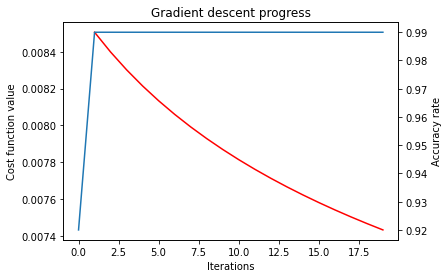

In [777]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(range(len(cost_history)), cost_history, color = "red", label = "cost")
ax1.set_ylabel("Cost function value")
ax1.set_xlabel("Iterations")
ax1.set_title("Gradient descent progress")
ax2 = ax1.twinx()
ax2.plot(range(len(cost_history)), correctness, label = "accuracy rate")
ax2.set_ylabel("Accuracy rate")
plt.show()

### 4.4 Train Naive Bayes Model

#### Continuous attributes

In [778]:
continuous = [
    'battery_power',
    'clock_speed',
    'fc',
    'int_memory',
    'm_dep',
    'mobile_wt',
    'pc',
    'px_height',
    'px_width',
    'ram',
    'sc_h',
    'sc_w',
    'talk_time'
]
uncontinuous = [
    'blue',
    'dual_sim',
    'four_g',
    'n_cores',
    'three_g',
    'touch_screen',
    'wifi'
]

In [779]:
naive_bayes = NaiveBayes(continuous, uncontinuous)
train_start_time_2 = time()
params = naive_bayes.fit(x_train, y_train)
train_end_time_2 = time()

#### Print parameters

In [780]:
print("Parameters of Naive Bayes Model: ", params)

Parameters of Naive Bayes Model:  {0: {'prior': 0.5, 'likelihood_con': {'battery_power': {'mean': 1175.10625, 'var': 182414.3774609375}, 'clock_speed': {'mean': 1.5196249999999998, 'var': 0.6902023593749999}, 'fc': {'mean': 4.19875, 'var': 18.8692484375}, 'int_memory': {'mean': 31.73625, 'var': 334.9341859375}, 'm_dep': {'mean': 0.50775, 'var': 0.0833899375}, 'mobile_wt': {'mean': 139.555, 'var': 1287.3169750000002}, 'pc': {'mean': 9.73375, 'var': 37.6578609375}, 'px_height': {'mean': 605.79375, 'var': 172565.0187109375}, 'px_width': {'mean': 1203.35875, 'var': 178876.47254843748}, 'ram': {'mean': 1228.09375, 'var': 368746.9049609375}, 'sc_h': {'mean': 12.23875, 'var': 17.7492484375}, 'sc_w': {'mean': 5.56375, 'var': 17.3759359375}, 'talk_time': {'mean': 10.88875, 'var': 30.273873437499997}}, 'likelihood_uncon': {'blue': {'likelihoods': {0: 0.51, 1: 0.49}}, 'dual_sim': {'likelihoods': {0: 0.49625, 1: 0.50375}}, 'four_g': {'likelihoods': {0: 0.4775, 1: 0.5225}}, 'n_cores': {'likelihoods

### 4.5 Train SVM Model

In [781]:
clf = svm.SVC()
train_start_time_3 = time()
clf.fit(x_train.values, y_train.values)
train_end_time_3 = time()

## 5. Test models

### 5.1 Test Logistic Regression Model

In [782]:
test_start_time_1 = time()
accuracy_result_1 = logistic_regression.test(x_test.values, y_test.values)
test_end_time_1 = time()
print('Accuracy of Logistic Regression Model: {:.2f}' .format(accuracy_result_1))

Accuracy of Logistic Regression Model: 0.98


### 5.2 Test Naive Bayes Model

In [783]:
test_start_time_2 = time()
accuracy_result_2 = naive_bayes.test(x_test, y_test)
test_end_time_2 = time()
print('Accuracy of Naive Bayes Model: {:.2f}' .format(accuracy_result_2))

Accuracy of Naive Bayes Model: 0.93


### 5.3 Test SVM Model

In [784]:
test_start_time_3 = time()
accuracy_result_3 = clf.score(x_test.values, y_test.values)
test_end_time_3 = time()
print('Accuracy of SVM Model: {:.2f}' .format(accuracy_result_3))

Accuracy of SVM Model: 0.97


## 6. Empirical Study

### 6.1 Compare the three methods with respect to the classification accuracy on the test set

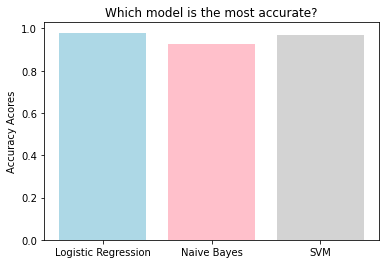

In [785]:
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
acc_scores = [accuracy_result_1, accuracy_result_2, accuracy_result_3]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("Accuracy Acores")
plt.title("Which model is the most accurate?")
plt.show()

#### We can see from the figure that Logistic Regression and SVM can achive nearly 100% accuracy, and Naive Bayes can achive the accuracy rate of about 95%

### 6.2 Time required by training each model

In [786]:
train_time_1 = train_end_time_1 - train_start_time_1
train_time_2 = train_end_time_2 - train_start_time_2
train_time_3 = train_end_time_3 - train_start_time_3

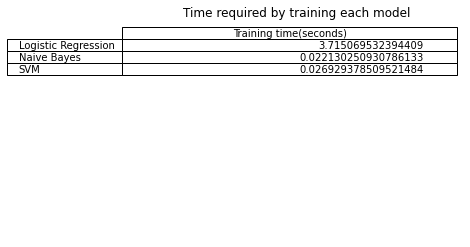

In [787]:
models = ["Logistic Regression","Naive Bayes","SVM"]
table_vals = [[train_time_1],[train_time_2],[train_time_3]]
plt.table(cellText = table_vals, rowLabels = models, colLabels = ["Training time(seconds)"], loc = "best")
plt.axis("off")
plt.title("Time required by training each model")
plt.show()

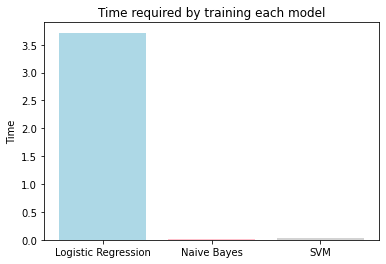

In [788]:
train_time = [train_time_1, train_time_2, train_time_3]
plt.bar(models, train_time, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("Time")
plt.title("Time required by training each model")
plt.show()

#### We can see from the figure that training Logistic Regression costs dramatically more time than training other two models

### 6.3 Time required by predicting

In [789]:
test_time_1 = test_end_time_1 - test_start_time_1
test_time_2 = test_end_time_2 - test_start_time_2
test_time_3 = test_end_time_3 - test_start_time_3

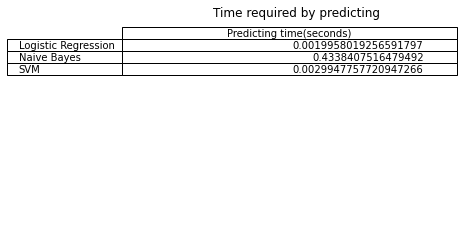

In [790]:
models = ["Logistic Regression","Naive Bayes","SVM"]
table_vals = [[test_time_1],[test_time_2],[test_time_3]]
plt.table(cellText = table_vals, rowLabels = models, colLabels = ["Predicting time(seconds)"], loc = "best")
plt.axis("off")
plt.title("Time required by predicting")
plt.show()

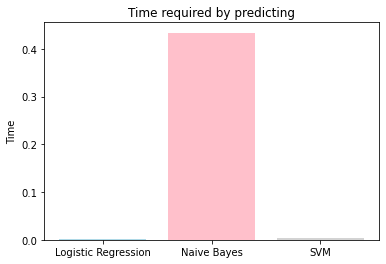

In [791]:
test_time = [test_time_1, test_time_2, test_time_3]
plt.bar(models, test_time, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("Time")
plt.title("Time required by predicting")
plt.show()

#### We can see from the figure that training Naive Bayes costs dramatically more time than training other two models

### 6.4 Conclusion

#### From the analysis above we can see that Logistic Regression and SVM achive better accuracy rate than Naive Bayes. In terms of time consuming, Logistic Regression takes dramatically more training time while Naive Bayes takes dramatically more predicting time.